In [11]:
import pandas as pd
import sqlite3
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path to your folder of CSVs
folder_path = r"C:\Users\S Das\Downloads\archive (3)"  # ← Update this
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Create SQLite connection
conn = sqlite3.connect("finance_data.db")  # or any .db file name

for file in csv_files:
    # Extract file name (used as table name)
    table_name = os.path.splitext(os.path.basename(file))[0]

    # Load CSV
    df = pd.read_csv(file)

    # Optional: Clean column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

    # Write to SQL table
    df.to_sql(table_name, conn, if_exists="replace", index=False)
    print(f"Imported '{file}' as table '{table_name}'")

conn.close()
print("✅ All CSVs imported into SQLite.")


Imported 'C:\Users\S Das\Downloads\archive (3)\test_Y3wMUE5_7gLdaTN.csv' as table 'test_Y3wMUE5_7gLdaTN'
Imported 'C:\Users\S Das\Downloads\archive (3)\train_mod.csv' as table 'train_mod'
Imported 'C:\Users\S Das\Downloads\archive (3)\train_u6lujuX_CVtuZ9i.csv' as table 'train_u6lujuX_CVtuZ9i'
✅ All CSVs imported into SQLite.


Re-Imported Data from sql after merging

In [12]:
# train_mod data file

df = pd.read_csv(r'C:\Users\S Das\Downloads\archive (3)\train_mod.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Degree,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df[df['Loan_ID'] == 'LP001273']

,Loan_ID,Gender,Married,Dependents,Degree,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N


Loan By Income

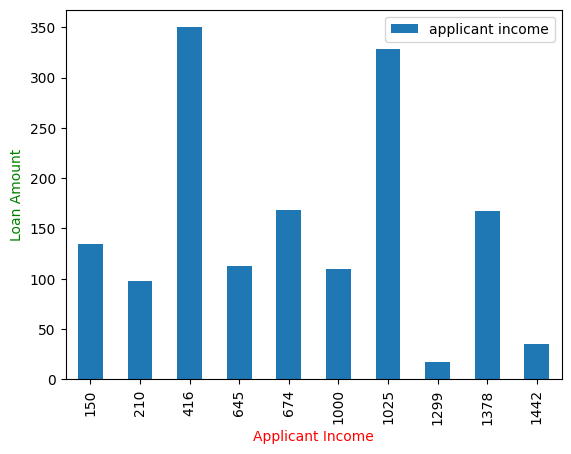

In [14]:
LoanByIncome = df.groupby('ApplicantIncome')['LoanAmount'].sum().head(10)
LoanByIncome.plot(kind='bar')
plt.xlabel('Applicant Income', color='red')
plt.ylabel('Loan Amount', color='green')
plt.legend(['applicant income'])

Loan Status (Approved & Rejected)

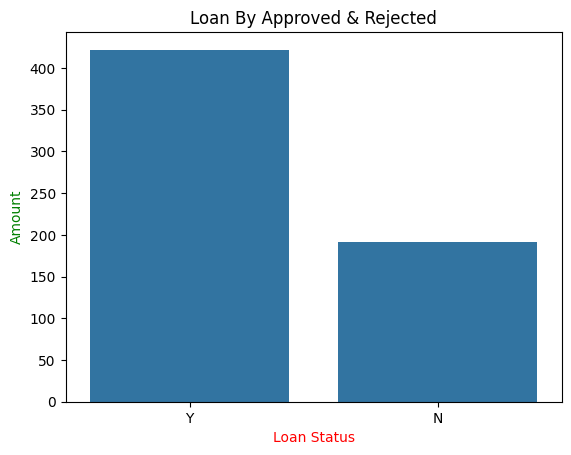

In [15]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan By Approved & Rejected')
plt.xlabel('Loan Status', color='red')
plt.ylabel('Amount', color='green')
plt.show()


Merged CSV


In [16]:
import pandas as pd

df = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/merged.csv')
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y,train
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,train
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,train
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y,train
3,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y,train
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y,train


Histogram compare of loan amt & Income

KeyError: 'ApplicantIncome'

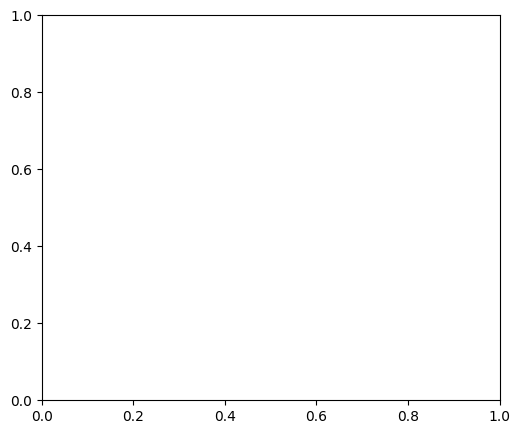

In [17]:
# histogram compare of loan amt & Income

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.hist(df['ApplicantIncome'].dropna(), bins=10)
plt.xlabel('Income', color='Red')
plt.ylabel('frequency', color='Green')

plt.subplot(1,2,2)
plt.hist(df['LoanAmount'].dropna(), bins=10)
plt.xlabel('Loan Amount', color='Red')
plt.ylabel('Frequency', color='Green')

plt.show()

In [18]:
#  box plot of laon amoun and education

sns.boxplot(x='LoanAmount', y='Degree', data=df)
plt.xlabel('Loan Amount', color='blue')
plt.ylabel('Education', color='Green')
plt.show()

ValueError: Could not interpret value `LoanAmount` for `x`. An entry with this name does not appear in `data`.

In [ ]:
df.head()

In [19]:
# Status by area

sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.xlabel('Property Area', color='blue')
plt.show()

ValueError: Could not interpret value `Property_Area` for `x`. An entry with this name does not appear in `data`.

Feature Creation : -- 

In [128]:
# total income 

df['TotalIncome'] = df['ApplicantIncome'] - df['CoapplicantIncome']

Applying logs 

In [135]:
df['LoanAmount'].isnull().sum()
df['LoanAmount'].min()

np.float64(9.0)

In [140]:
median_value = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_value)

# creating a new col with log 
df['LoanAmt_LOG'] = np.log(df['LoanAmount'])

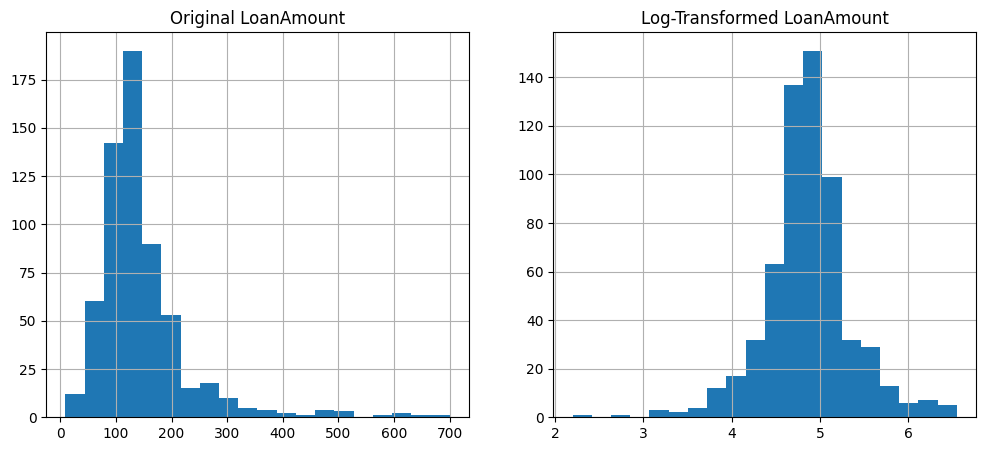

In [143]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['LoanAmount'].hist(bins=20)
plt.title("Original LoanAmount")

plt.subplot(1, 2, 2)
df['LoanAmt_LOG'].hist(bins=20)
plt.title("Log-Transformed LoanAmount")
plt.show()


In [148]:
# drop test modelling 

from sklearn.model_selection import train_test_split

# seprating target col form the set 
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status'] # initializing it

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmt_LOG
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.00000,0.842199,3782.213485,4.857250
std,6109.041673,2926.248369,84.107233,65.12041,0.364878,7074.765039,0.495996
min,150.000000,0.000000,9.000000,12.00000,0.000000,-41251.000000,2.197225
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,818.250000,4.607658
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,2719.000000,4.852030
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,4911.500000,5.104426
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000,6.551080


Based on historic data we will try to predict if we can egt loan or not 


In [10]:
df.head()

NameError: name 'df' is not defined

In [40]:
# importing liabs
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# file directory 
df = pd.read_csv(r'C:\Users\S Das\Downloads\archive (3)\train_mod.csv')

#  separating data 
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# handling missing values if any
X = X.fillna(0)

# encode categorical vars
X = pd.get_dummies(X, drop_first=True)

# split the data to train & test (preventing cheating)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scaling the feature
scaler = StandardScaler() # import scaler 
X_train_data = scaler.fit_transform(X_train) # feeding it with fit_transform()    
X_test_data = scaler.transform(X_test) # final testing the model 

# train the logistic regression model
model = LogisticRegression()
model.fit(X_train_data, y_train)

# predict the actual models
y_pred = model.predict(X_test_data)

# metric comaparison
print("1.", accuracy_score(y_test, y_pred)) # accuracy
print("2.",confusion_matrix(y_test, y_pred)) # confusion mtrix
print("3.",classification_report(y_test, y_pred)) # classification report

1. 0.7560975609756098
2. [[18 25]
 [ 5 75]]
3.               precision    recall  f1-score   support

           N       0.78      0.42      0.55        43
           Y       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



In [9]:
print(y.value_counts())

NameError: name 'y' is not defined

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Accuracy
accuracy = accuracy_score(y_test, predict)
print(f"\n✅ Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, predict)
cm_df = pd.DataFrame(cm, index=['Actual N', 'Actual Y'], columns=['Predicted N', 'Predicted Y'])
print("\n📊 Confusion Matrix:")
print(cm_df)

# Classification report
report = classification_report(y_test, predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\n📋 Classification Report:")
print(report_df.round(2))


NameError: name 'y_test' is not defined